In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

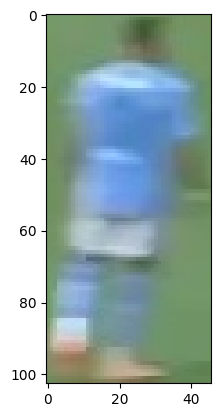

In [4]:
plt.imshow(image)
plt.show()

Top half of image

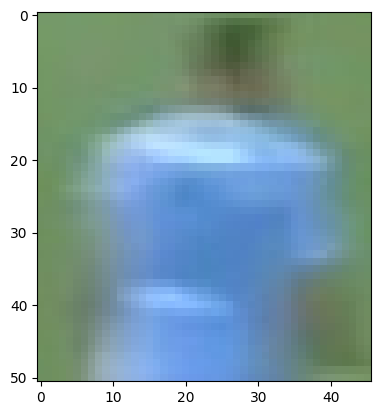

In [5]:
top_half = image[0 : int(image.shape[0]/2), :]
plt.imshow(top_half)
plt.show()

Cluster Image

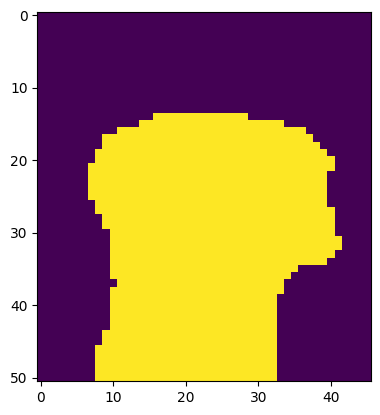

In [10]:
image_2d = top_half.reshape(-1,3)                                       # Reshape the image into 2-D array
kmeans = KMeans(n_clusters=2,random_state=0).fit(image_2d)           # Perform k-means clustering with 2 clusters
labels = kmeans.labels_                                              # Get cluster labels
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])     # Reshape labels into original image shape
plt.imshow(clustered_image)                                          # Display image
plt.show()

In [11]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [12]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [13]:
kmeans.cluster_centers_[player_cluster]

array([113.23114594, 157.61116552, 208.36728697])